# introduction to redge regression and lasso regularization 


Least Square Method finds the Best and Unbiased Coefficients




# Least Square Method finds the Best and Unbiased Coefficients
You may know that least square method finds the coefficients that best fit the data. One more condition to be added is that it also finds the unbiased coefficients. Here unbiased means that OLS doesn’t consider which independent variable is more important than others. It simply finds the coefficients for a given data set. In short, there is only one set of betas to be found, resulting in the lowest ‘Residual Sum of Squares (RSS)’. The question then becomes “Is a model with the lowest RSS truly the best model?”.

# Bias vs. Variance
The answer for the question above is “Not really”. As hinted in the word ‘Unbiased’, we need to consider ‘Bias’ too. Bias means how equally a model cares about its predictors. Let’s say there are two models to predict an apple price with two predictor ‘sweetness’ and ‘shine’; one model is unbiased and the other is biased.
First, the unbiased model tries to find the relationship between the two features and the prices, just as the OLS method does. This model will fit the observations as perfectly as possible to minimize the RSS. However, this could easily lead to overfitting issues. In other words, the model will not perform as well with new data because it is built for the given data so specifically that it may not fit new data.

In [1]:
# dataframe and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)

In [5]:
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

# iterate lambdas
for alpha in np.arange(0, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

# organize dataframe
# ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, 1).reset_index()

AttributeError: 'DataFrame' object has no attribute 'RM'

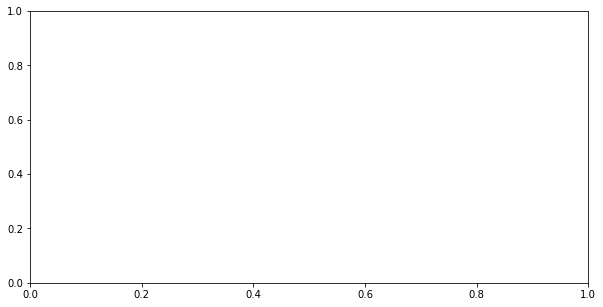

In [6]:

# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)

In [7]:
# MSE of Ridge and OLS
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
ols_mse = mean_squared_error(y_test, ols_pred)

# plot mse
plt.plot(ridge_mse_test[:25], 'ro')
plt.axhline(y=ols_mse, color='g', linestyle='--')
plt.title("Ridge Test Set MSE", fontsize=16)
plt.xlabel("Model Simplicity$\longrightarrow$")
plt.ylabel("MSE")

NameError: name 'ols_pred' is not defined

# Conclusion
We looked into ridge regression at different angles from mathematical formula, matrix format, to geometric expression. Through these, we could understand that ridge regression is basically a linear regression with penalty. Through the demonstration, we confirmed that there is no equation for finding the best lambda. Thus, we needed to iterate a series of values and evaluate prediction performances with MSE. By doing so, we found that the ridge regression model performs better than the plain linear regression model for prediction.
1)OLS simply finds the best fit for given data
2)Features have different contributions to RSS
3)Ridge regression gives a bias to important features
4)MSE or R-square can be used to find the best lambda

# we only add penalty to the training data

# Standardization
In Ridge Regression first, we have to standardize the variables for which we have to subtract their mean values and then by dividing by their standard deviation. But it's confusing and difficult as we have to mention if the variables in that formula are standardized or not. Thus we can say that the ridge trace is on a standardized scale.

# Lasso is a method of adjusting the parameters in a regression to account for the complexity of the model. 
Use Lasso when you have more number of features, because it automatically does feature selection.

Ridge regression is a biased method of regression that reduces the variance of the estimators.

![title](tradeoff.png)

![title](ridge.png)

# Apart from OLS (the first part), ridge regression squares every individual slope of the feature variables and scales them by some number 𝜆. 
This is called the Ridge Regression penalty. What this penalty essentially does is shrink all coefficients (slopes). This shrinkage has a double effect:

1)We avoid overfitting with lower coefficients. As lambda is just some constant, it has the same scaling effect on all coefficients. For example, by choosing a low value for lambda like 0.1, we get to scale all coefficients both large and small.

2)This scaling also introduces some bias to the completely unbiased LR. Think about it this way — if you square a large number, you get an even larger number. By choosing a low value like 0.01 you get to shrink the number a lot. But if you square small numbers such as numbers lower than 1, instead of getting a larger number, you get an even smaller number. And multiplying it by 0.01, you manage to make it even smaller. This way, ridge regression gets to make important features more pronounced and shrink unimportant ones close to 0 which leads to a more simplified model.

In [8]:
# let get our hand dirty
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [100]:
dataset=pd.read_csv("./train.csv")
# dataset
label=dataset.SalePrice

In [126]:
# easiest way to remove categorical data
features=dataset._get_numeric_data()
data=features
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(999, inplace=True)

In [128]:

# features=dataset.drop('SalePrice', axis=1)
# label=dataset.SalePrice
# features=features.drop("MSZoning",axis=1)
# features=features.iloc[:,0:2]

In [129]:
# features
# label
X_train, X_test, y_train, y_test = train_test_split(data, label, 
                            test_size=.3, random_state=1121218)

In [118]:
# we will fit model to linear regression first and after that we will fit to ridge regression

In [130]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error

In [134]:
# Initilize, fit, predict
lin_reg = LinearRegression()
_ = lin_reg.fit(X_train, y_train)
preds = lin_reg.predict(X_test)

In [132]:
#                                        pratice

# way to remove all catergorical data
# features=dataset._get_numeric_data()

# this way also
# source.select_dtypes(['number']) or source.select_dtypes([np.number]

# another way
# import pandas as pd
# import numpy as np

# animal = ['dog','cat','horse']

# df = pd.DataFrame({'A': np.random.rand(9),
#                    'B': [animal[np.random.randint(3)] for i in range(9)],
#                    'C': np.random.rand(9),
#                    'D': np.random.rand(9)})

# df_array = df.values
# df_columns = df.columns

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# ct = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
# df_dummies = np.array(ct.fit_transform(df_array), dtype=np.float)

# https://stackoverflow.com/questions/12725417/drop-non-numeric-columns-from-a-pandas-dataframe

# removig float data
# df = pd.read_csv('./train.csv', index_col=0)
# non_floats = []
# for col in df:
#     if df[col].dtypes != "float64" :
#         non_floats.append(col)
# df = df.drop(columns=non_floats)


In [138]:
print("Training score:", lin_reg.score(X_train, y_train))
print("Testing score:", lin_reg.score(X_test, y_test))
print("MAE of Linear Regression:", mean_absolute_error(y_test, preds), '\n')

Training score: 1.0
Testing score: 1.0
MAE of Linear Regression: 4.438666380159387e-11 



# RidgeCv
Now, instead of blindly trying out a bunch of values for alpha, we can use cross-validation using RidgeCV. Instead of taking a single value for alpha, RidgeCV takes a list of possible alphas and tries them out using cross-validation, just like GridSearch:


In [139]:
ridge = Ridge(alpha=0.1)
_ = ridge.fit(X_train, y_train)
preds = ridge.predict(X_test)
print("Training score:", ridge.score(X_train, y_train))
print("Testing score:", ridge.score(X_test, y_test))
print("MAE of Ridge Regression:", mean_absolute_error(y_test, preds), '\n')

Training score: 1.0
Testing score: 1.0
MAE of Ridge Regression: 2.3052492923184074e-09 



In [141]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.arange(1, 100, 5), scoring='r2', cv=10)
_ = ridge.fit(data, label)

In [143]:
best_alpha=ridge.alpha_

In [144]:
ridge = Ridge(alpha=86)
_ = ridge.fit(X_train, y_train)
preds = ridge.predict(X_test)

print("Training score:", ridge.score(X_train, y_train))
print("Testing score:", ridge.score(X_test, y_test))
print("MAE of Ridge Regression:", mean_absolute_error(y_test, preds), '\n')

Training score: 1.0
Testing score: 1.0
MAE of Ridge Regression: 1.8915955865538794e-06 



# Instead of taking the square of each coefficient, Lasso regression takes the absolute values of them.
The rest are practically the same. Let’s see the regressor in action on a new dataset. I will load in the built-in diamonds dataset from Seaborn:

In [145]:
# let see now,Lasso Regression

In [147]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [148]:
X = pd.get_dummies(diamonds.drop('price', axis=1))
y = diamonds.price

In [149]:
X

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [152]:
from sklearn.linear_model import Lasso, LassoCV

lasso = LassoCV(alphas=np.arange(0.000000001, 1, 0.05), cv=10)
_ = lasso.fit(X, y)

print("Best alpha:", lasso.alpha_)
# Best alpha: 1e-09

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 950903774.3230133, tolerance: 84838271.7398739
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 763823417.9263306, tolerance: 85104328.74157205
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 893331331.2590714, tolerance: 83762678.05519785
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Con

Best alpha: 1e-09


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                  test_size=.3, random_state=1121218)
lasso = Lasso(alpha=int(1e-09))

In [154]:
lasso.fit(X_train, y_train)
preds = lasso.predict(X_test)

<ipython-input-154-de7d111a9903>:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24194747453.748634, tolerance: 60533114.97531533
  model = cd_fast.enet_coordinate_descent(


In [155]:
print("Training score:", lasso.score(X_train, y_train))
print("Testing score:", lasso.score(X_test, y_test))
print("MAE of Lasso Regression:", mean_absolute_error(y_test, preds), '\n')


Training score: 0.9200611187327303
Testing score: 0.9190684668165137
MAE of Lasso Regression: 742.5549731842253 



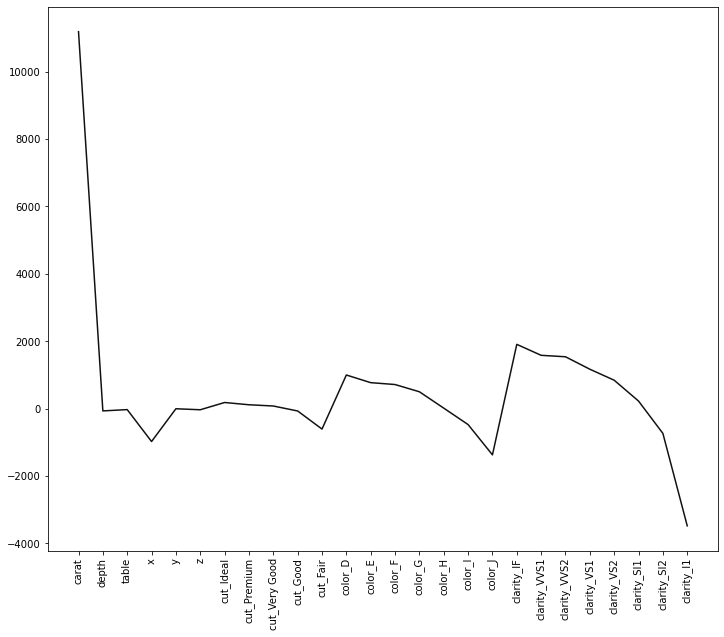

In [156]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.plot(X_train.columns, lasso.coef_, color='#111111')

plt.setp(ax.get_xticklabels(), rotation=90);

# That is the main difference between Ridge and Lasso. Lasso can shrink coefficients all the way to 0 while Ridge never can.